In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')


dataset_total = pd.read_excel('서울시 코로나19 확진자 발생동향.xlsx')

In [ ]:
dataset = pd.read_excel('코로나-지하철 데이터세트 최종.xlsx')

In [373]:
date_1_start = '2020-02-05'
date_1_end = '2020-08-05'
date_2_start = '2021-01-27'
date_2_end = '2021-06-25'
date_3_start = '2021-07-10'
date_3_end = '2021-11-05'
date_4_start = '2022-07-10'
date_4_end = '2022-11-07'

In [9]:
dataset_copy = dataset

In [10]:
dataset = dataset[['date', '호선', '역명', '총 승차', '서울시 일일 확진자', '전국 일일 확진자']]

<AxesSubplot:xlabel='date', ylabel='서울시 일일 확진자'>

C:\Users\dlrud\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  func(*args, **kwargs)
C:\Users\dlrud\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  func(*args, **kwargs)
C:\Users\dlrud\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
C:\Users\dlrud\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
C:\Users\dlrud\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  func(*args, **kwargs)
C:\Users\dlrud\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current 

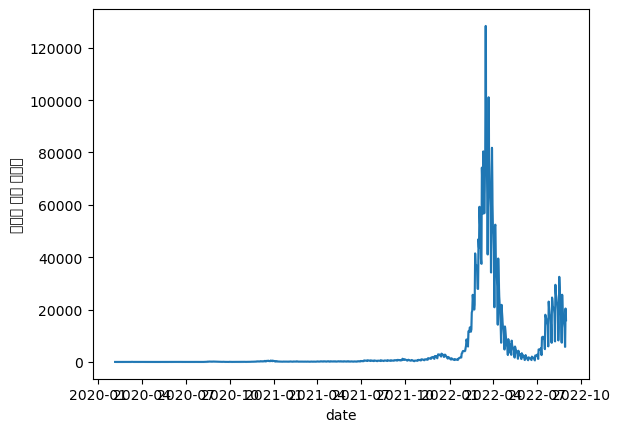

In [11]:
sns.lineplot(data=dataset, x='date', y='서울시 일일 확진자', estimator='average')

In [17]:
pivot = pd.pivot_table(data=dataset, index='date', values='서울시 일일 확진자', aggfunc='mean').reset_index()
pivot

,date,서울시 일일 확진자
0,2020-02-05,2
1,2020-02-06,2
2,2020-02-07,0
3,2020-02-08,0
4,2020-02-09,0
...,...,...
934,2022-08-27,14581
935,2022-08-28,13047
936,2022-08-29,5753
937,2022-08-30,20410


<AxesSubplot:xlabel='date', ylabel='서울시 일일 확진자'>

C:\Users\dlrud\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  func(*args, **kwargs)
C:\Users\dlrud\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  func(*args, **kwargs)
C:\Users\dlrud\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
C:\Users\dlrud\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
C:\Users\dlrud\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  func(*args, **kwargs)
C:\Users\dlrud\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current 

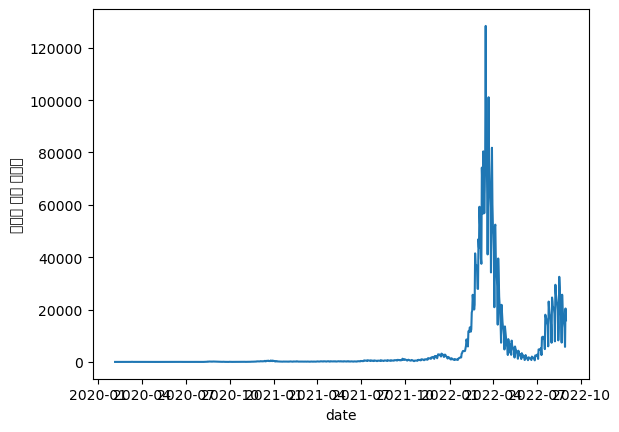

In [21]:
sns.lineplot(data=pivot, x='date', y='서울시 일일 확진자')

In [23]:
pivot2 = pd.pivot_table(data=dataset, index=['date', '호선'], values='총 승차', aggfunc='mean').reset_index()

C:\Users\dlrud\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\dlrud\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  func(*args, **kwargs)
C:\Users\dlrud\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  func(*args, **kwargs)
C:\Users\dlrud\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  func(*args, **kwargs)
C:\Users\dlrud\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\dlrud\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing fro

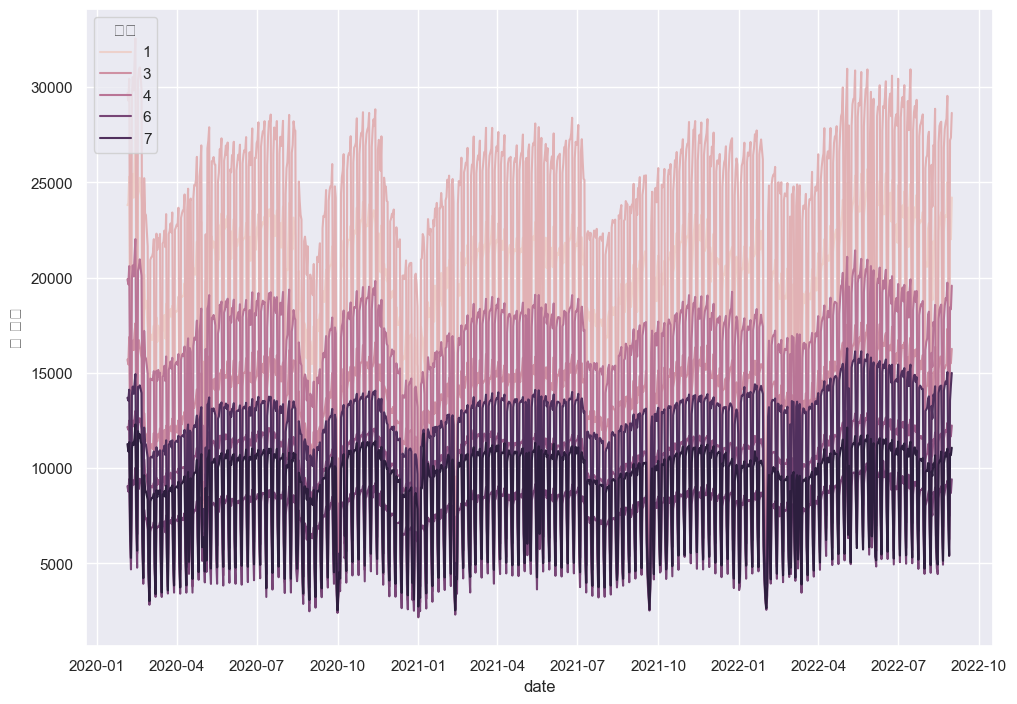

In [29]:
sns.lineplot(data=pivot2, x='date', y='총 승차', hue='호선')
sns.set(rc={'figure.figsize':(15,10)})

In [185]:
cond1 = (dataset['역명'] == '서울역')
cond2 = (dataset['호선'] == 1)

In [186]:
dataset_1 = dataset[(dataset['date'] >= '2020-02-05') & (dataset['date'] <= '2020-08-05')]

In [187]:
pivot = pd.pivot_table(data=dataset_1, index='date', values='서울시 일일 확진자', aggfunc='mean').reset_index()

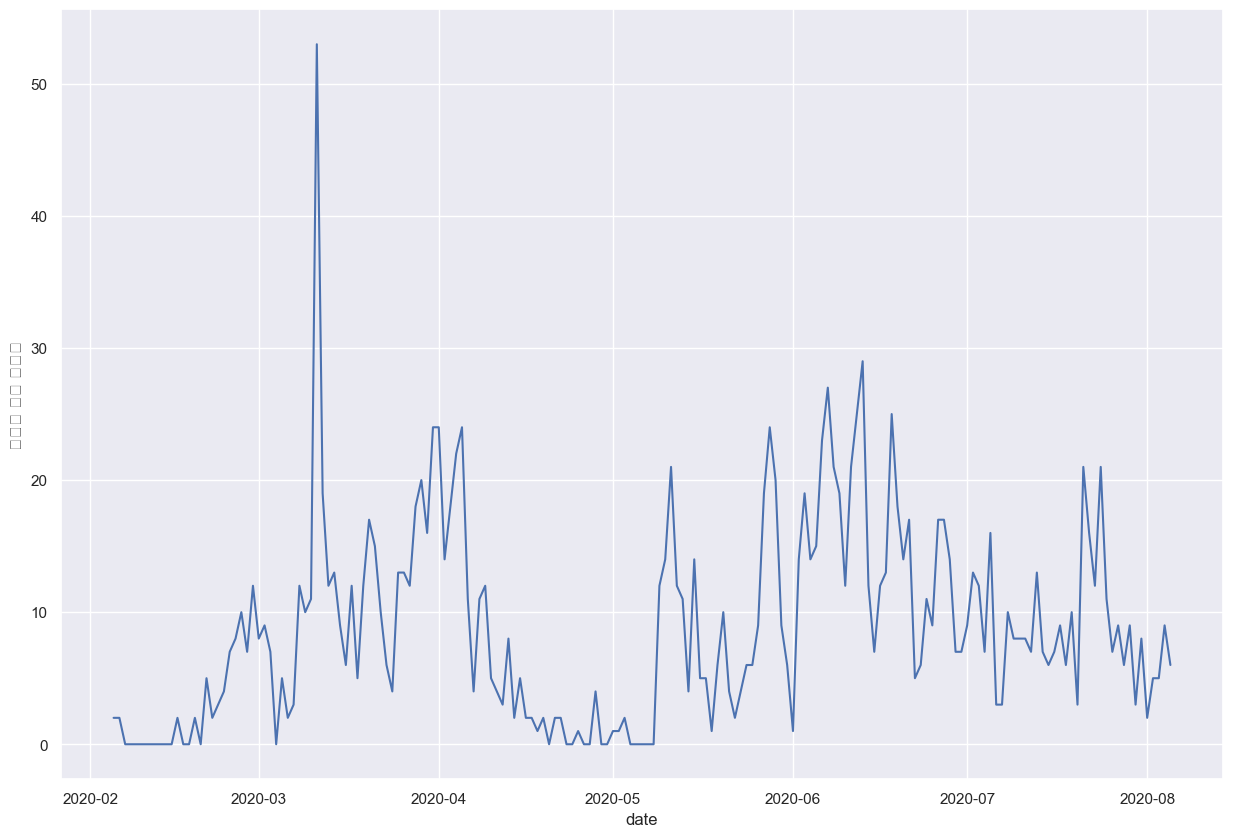

In [188]:
sns.lineplot(data=pivot, x='date', y='서울시 일일 확진자')
sns.set(rc={'figure.figsize':(15,10)})

In [203]:
import statsmodels.tsa.api as tsa
from pylab import rcParams

In [198]:
dataset_station = dataset_1[cond1&cond2]

In [199]:
pivot_station = pd.pivot_table(data=dataset_station, index='date', values='서울시 일일 확진자', aggfunc='sum')

In [200]:
y = pivot_station['서울시 일일 확진자'].resample('1D').mean() # 1일마다 평균

In [201]:
y.fillna(method = 'ffill',inplace=True)

* 시계열 분해 
    - Trend (추세요인)
    - Seasonality (계절요인)
    - Cycle/Residiual(불규칙 또는 순환 요인)

In [210]:
rcParams['figure.figsize'] = 18,10

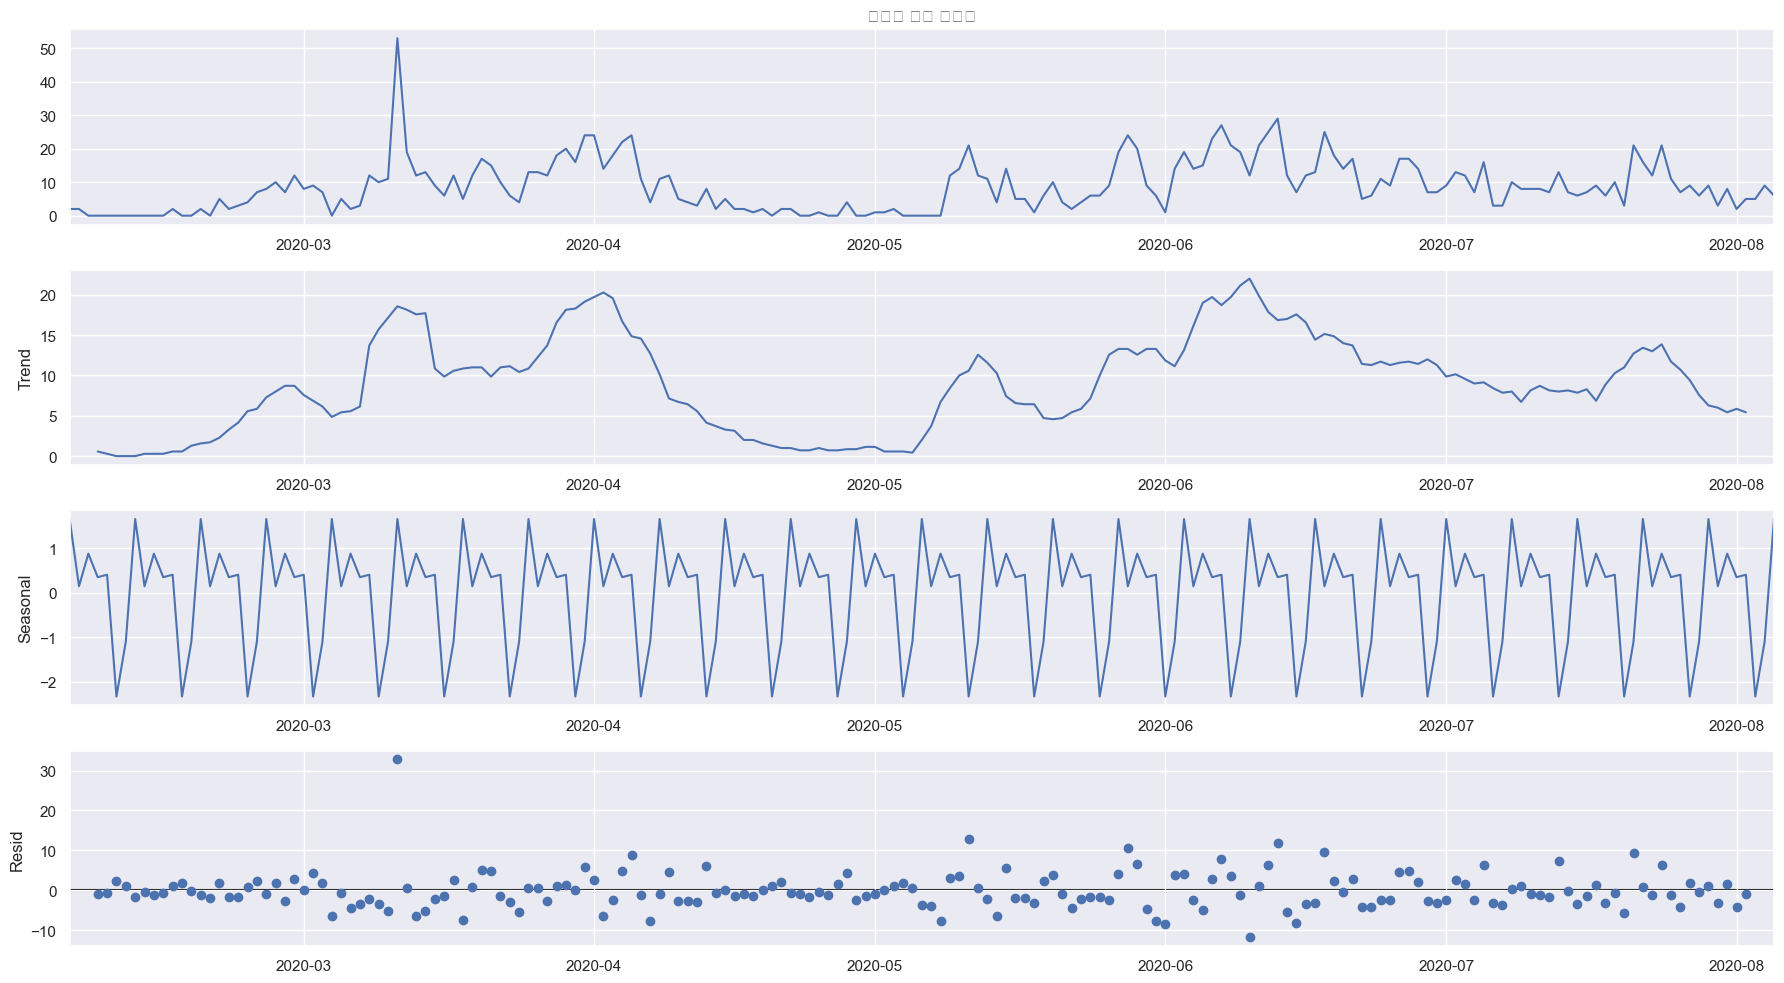

In [209]:
# 시계열 모델 생성
model_seires = tsa.seasonal_decompose(y, model='additive')
# 모델 시각화
fig = model_seires.plot()
plt.show()

In [211]:
import itertools

In [212]:
p = d = q = range(0,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [216]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [213]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [215]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y, order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
            continue

In [217]:
ARIMA_list = pd.DataFrame({'Parameter' : param_list, 'Seasonal':param_seasonal_list,'AIC' : results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

**Likelihood(최대우도) : 특정 데이터가 모수로부터 추출되었을 가능도(가능성)**
    - 특정 값에 대한 분포의 확률 추정 (연속 확률 밀도 함수 pdf의 y값)
- ** AIC (Akaike Information Criterion) : 데이터에 대한 모델의 상대적 품질
    - AIC = -2 ln(L) + 2k
    - 값이 낮을 수록 모형 적합도가 높은것을 의미

In [218]:
ARIMA_list.sort_values(by='AIC')

,Parameter,Seasonal,AIC
121,"(1, 1, 1)","(0, 1, 1, 12)",1037.838357
59,"(1, 1, 1)","(0, 1, 1, 12)",1037.838357
125,"(1, 1, 1)","(1, 1, 1, 12)",1040.146819
63,"(1, 1, 1)","(1, 1, 1, 12)",1040.146819
43,"(1, 0, 1)","(0, 1, 1, 12)",1040.815492
...,...,...,...
1,"(0, 0, 0)","(0, 0, 1, 12)",1287.104958
70,"(0, 0, 1)","(0, 0, 0, 12)",1296.100313
8,"(0, 0, 1)","(0, 0, 0, 12)",1296.100313
64,"(0, 0, 0)","(0, 0, 0, 12)",1415.608524


In [220]:
mod = tsa.statespace.SARIMAX(y, order=(1,1,1), seasonal_order=(0,1,1,12),
                                enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         서울시 일일 확진자   No. Observations:                  183
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -514.919
Date:                            Sun, 06 Nov 2022   AIC                           1037.838
Time:                                    21:30:33   BIC                           1050.038
Sample:                                02-05-2020   HQIC                          1042.793
                                     - 08-05-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3962      0.105      3.774      0.000       0.190       0.602
ma.L1         -0.8349      0.083   

In [242]:
pred_ci.head()

,lower 서울시 일일 확진자,upper 서울시 일일 확진자
date,,
2020-02-05,-3394.757202,3394.757202
2020-02-06,-2841.153014,2845.681250
2020-02-07,-2826.302872,2830.402313
2020-02-08,-2828.213905,2827.409164
2020-02-09,-2827.868524,2827.715354


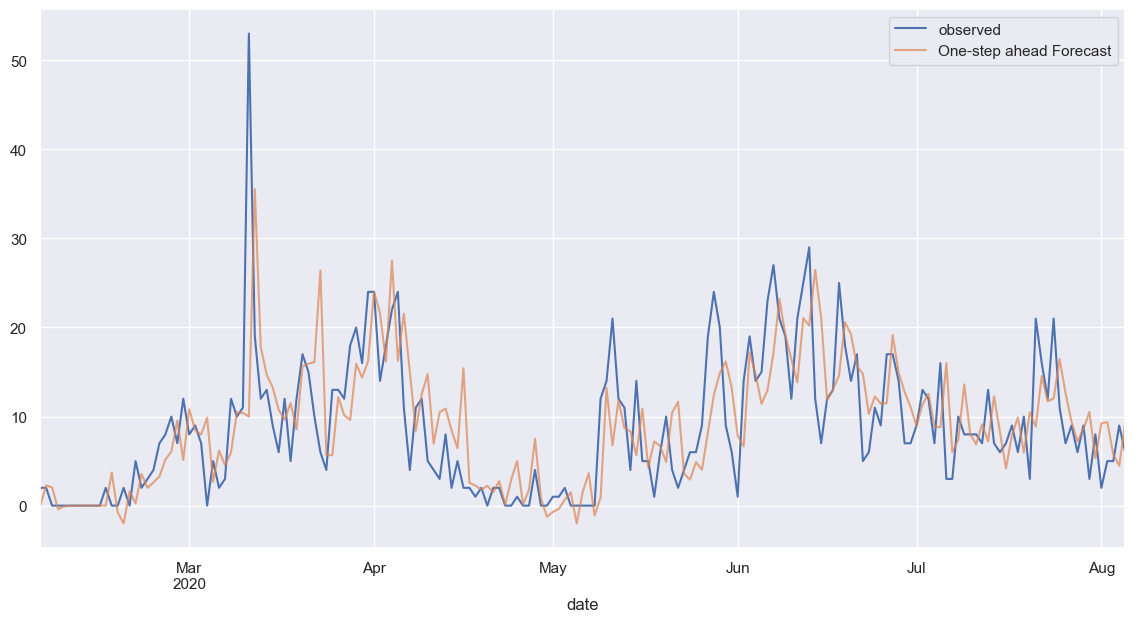

In [249]:
pred = results.get_prediction(start=pd.to_datetime('2020-02-05'), dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

plt.legend()
plt.show()

In [243]:
pred = results.get_prediction(start=pd.to_datetime('2020-02-05'), dynamic=False)
pd.DataFrame(pred.predicted_mean).reset_index()

,date,predicted_mean
0,2020-02-05,0.000000
1,2020-02-06,2.264118
2,2020-02-07,2.049721
3,2020-02-08,-0.402370
4,2020-02-09,-0.076585
...,...,...
178,2020-08-01,9.236862
179,2020-08-02,9.383177
180,2020-08-03,5.778159
181,2020-08-04,4.468483


In [245]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-02-05':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

MSE 40.13


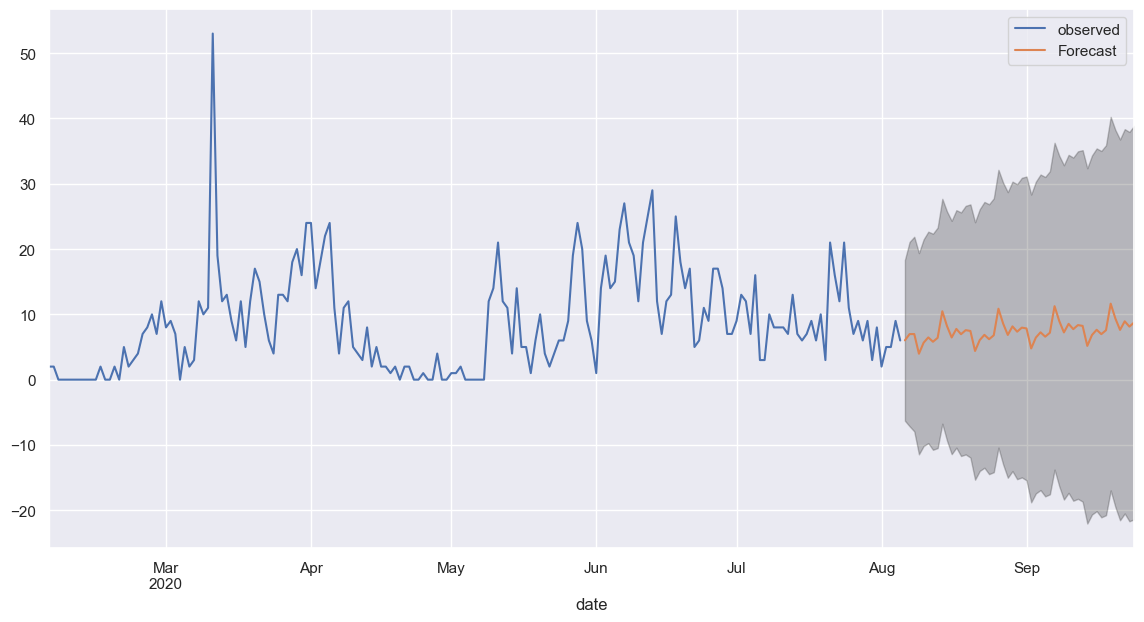

In [244]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int() #추정된 계수의 신뢰구간 계산
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)

plt.legend()
plt.show()

- order (p,d,q), seasonal (P,D,Q,R)
    - p : AR에서의 p값 (p구간 내 데이터 사이의 상관관계)
    - d : 차분
    - q : q MA PACF 편상관계수 q값
    - P : 계절성 주기에서의 패턴
    - D : 계절성 여부
    - Q : ACF 함수 기준으로 주기의 패턴이 얼마나 반복되는지, 계절성이 얼마나 반복되는지 횟수
    - M : 계절성 주기가 어느정도

In [224]:
import os
import datetime
from datetime import datetime

# Arima 모델 패키지
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# Auto ARIMA
# pip install --user pmdarima


# 2구간

In [259]:
dataset_2 = dataset_total[(dataset_total['date'] >= '2021-01-27') & (dataset_total['date'] <= '2021-06-25')][['date', '서울']]
pivot_station = pd.pivot_table(data=dataset_2, index='date', values='서울', aggfunc='sum')
y_2 = pivot_station['서울'].resample('1D').mean() # 1일마다 평균

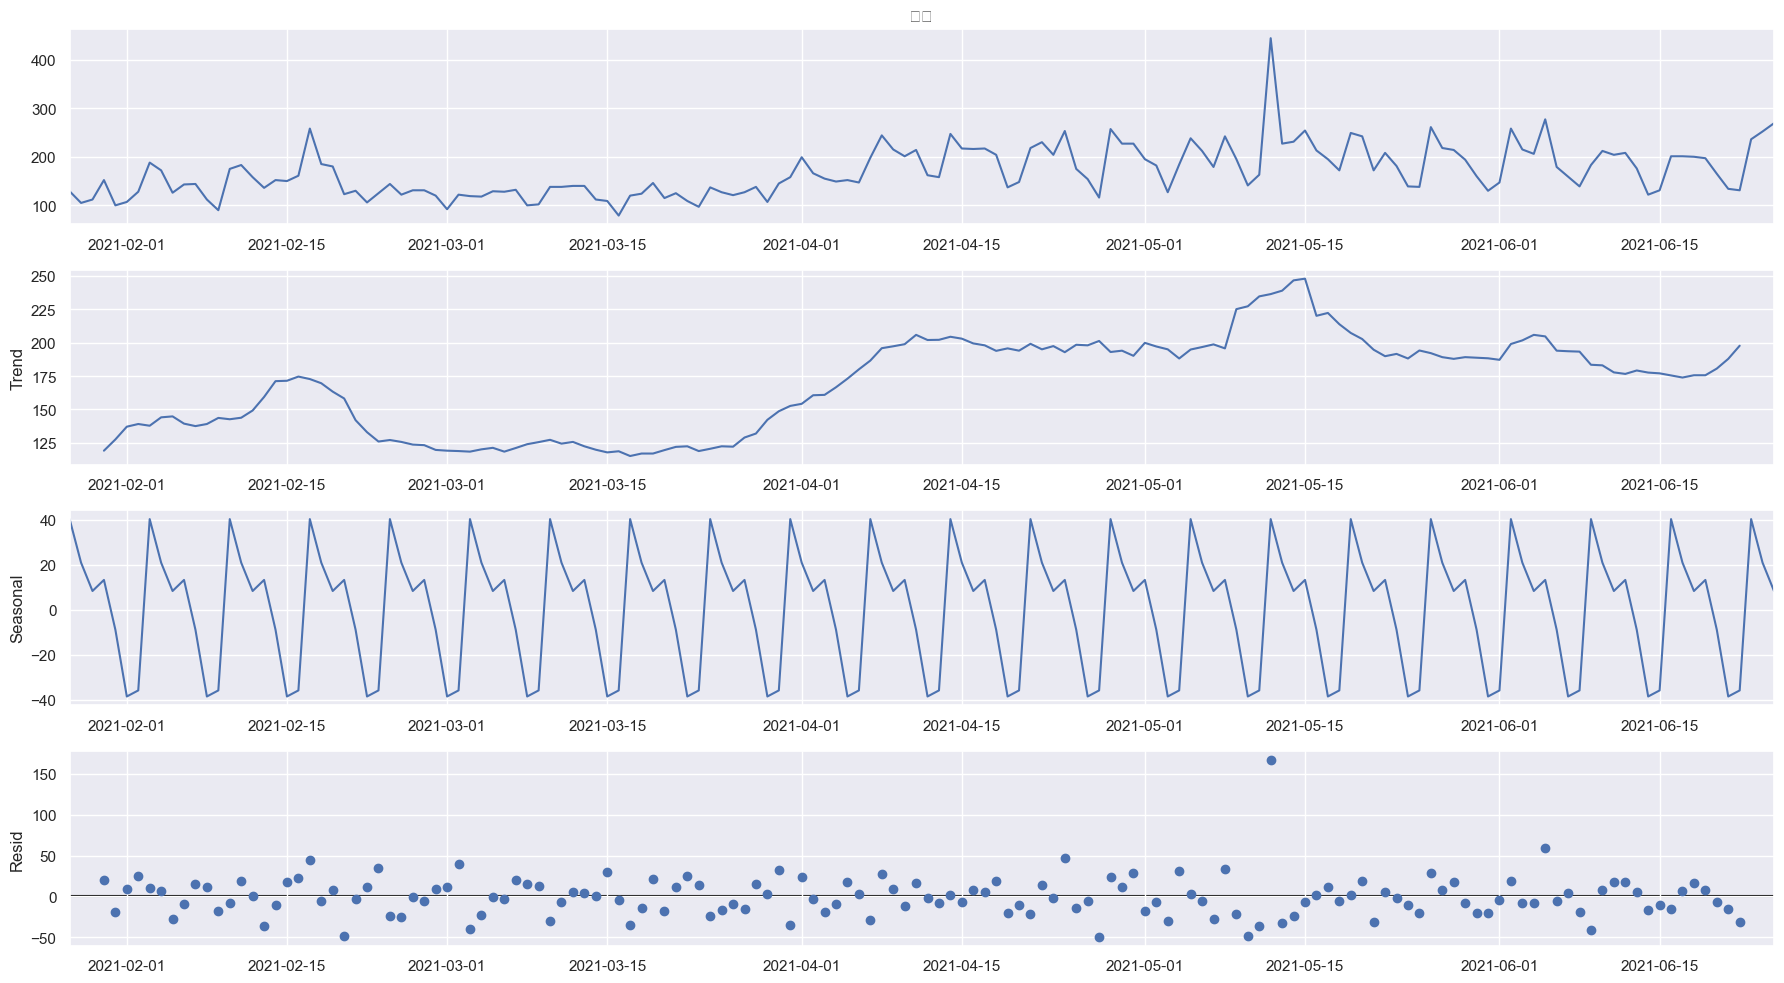

In [263]:
rcParams['figure.figsize'] = 18,10

# 시계열 모델 생성
model_seires = tsa.seasonal_decompose(y_2, model='additive')
# 모델 시각화
fig = model_seires.plot()
plt.show()

In [264]:
p = d = q = range(0,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

param_list = []
param_seasonal_list = []
results_AIC_list = []

In [265]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y_2, order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
            continue

In [266]:
ARIMA_list = pd.DataFrame({'Parameter' : param_list, 'Seasonal':param_seasonal_list,'AIC' : results_AIC_list})
ARIMA_list.to_excel('arima_model_list_2.xlsx')

In [267]:
ARIMA_list.sort_values(by='AIC')

,Parameter,Seasonal,AIC
63,"(1, 1, 1)","(1, 1, 1, 12)",1296.077918
59,"(1, 1, 1)","(0, 1, 1, 12)",1297.987506
31,"(0, 1, 1)","(1, 1, 1, 12)",1302.325373
27,"(0, 1, 1)","(0, 1, 1, 12)",1304.481855
47,"(1, 0, 1)","(1, 1, 1, 12)",1314.213437
...,...,...,...
32,"(1, 0, 0)","(0, 0, 0, 12)",1584.786837
9,"(0, 0, 1)","(0, 0, 1, 12)",1608.370103
1,"(0, 0, 0)","(0, 0, 1, 12)",1714.138121
8,"(0, 0, 1)","(0, 0, 0, 12)",1815.826859


In [268]:
mod = tsa.statespace.SARIMAX(y_2, order=(1,1,1), seasonal_order=(1,1,1,12),
                                enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                 서울   No. Observations:                  150
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -643.039
Date:                            Mon, 07 Nov 2022   AIC                           1296.078
Time:                                    12:47:34   BIC                           1310.139
Sample:                                01-27-2021   HQIC                          1301.789
                                     - 06-25-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2968      0.113      2.633      0.008       0.076       0.518
ma.L1         -0.8692      0.075   

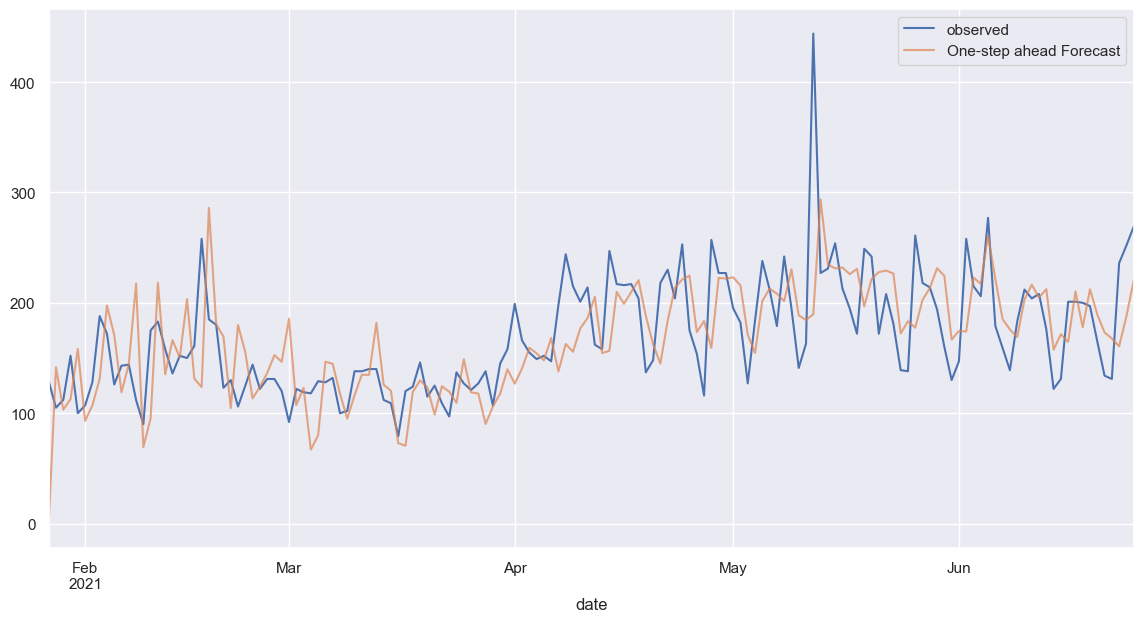

In [270]:
pred = results.get_prediction(start=pd.to_datetime('2021-01-27'), dynamic=False)
pred_ci = pred.conf_int()

ax = y_2.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

plt.legend()
plt.show()

In [271]:
pred_ci.head()

,lower 서울,upper 서울
date,,
2021-01-27,-3394.757202,3394.757202
2021-01-28,-2671.547129,2955.068176
2021-01-29,-2701.517064,2907.912692
2021-01-30,-2691.737897,2917.329154
2021-01-31,-2646.368621,2962.690739


In [276]:
pred = results.get_prediction(start=pd.to_datetime('2021-01-27'), dynamic=False)
pd.DataFrame(pred.predicted_mean).reset_index()

,date,predicted_mean
0,2021-01-27,0.000000
1,2021-01-28,141.760523
2,2021-01-29,103.197814
3,2021-01-30,112.795629
4,2021-01-31,158.161059
...,...,...
145,2021-06-21,173.161561
146,2021-06-22,167.687331
147,2021-06-23,160.550462
148,2021-06-24,187.791589


In [279]:
y_forecasted = pred.predicted_mean
y_truth = y_2['2021-01-27':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

MSE 2190.71


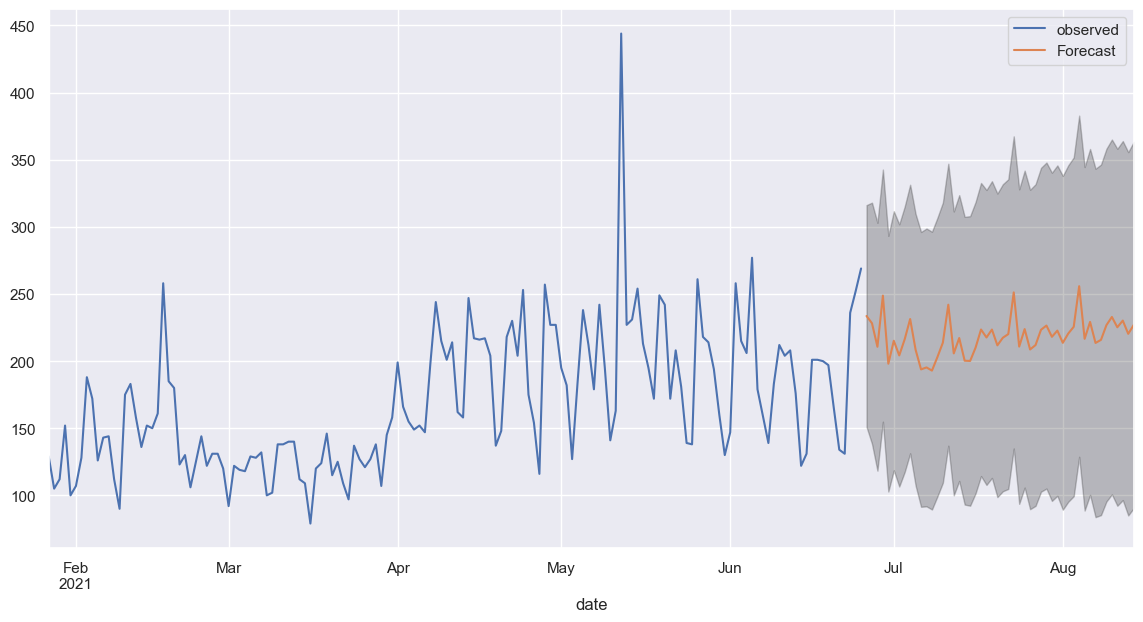

In [280]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int() #추정된 계수의 신뢰구간 계산
ax = y_2.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)

plt.legend()
plt.show()

# 3구간 (2021-07-10 ~ 2021-11-05) 

In [281]:
dataset_3 = dataset_total[(dataset_total['date'] >= '2021-07-10') & (dataset_total['date'] <= '2021-11-05')][['date', '서울']]
pivot_station = pd.pivot_table(data=dataset_3, index='date', values='서울', aggfunc='sum')
y_3 = pivot_station['서울'].resample('1D').mean() 

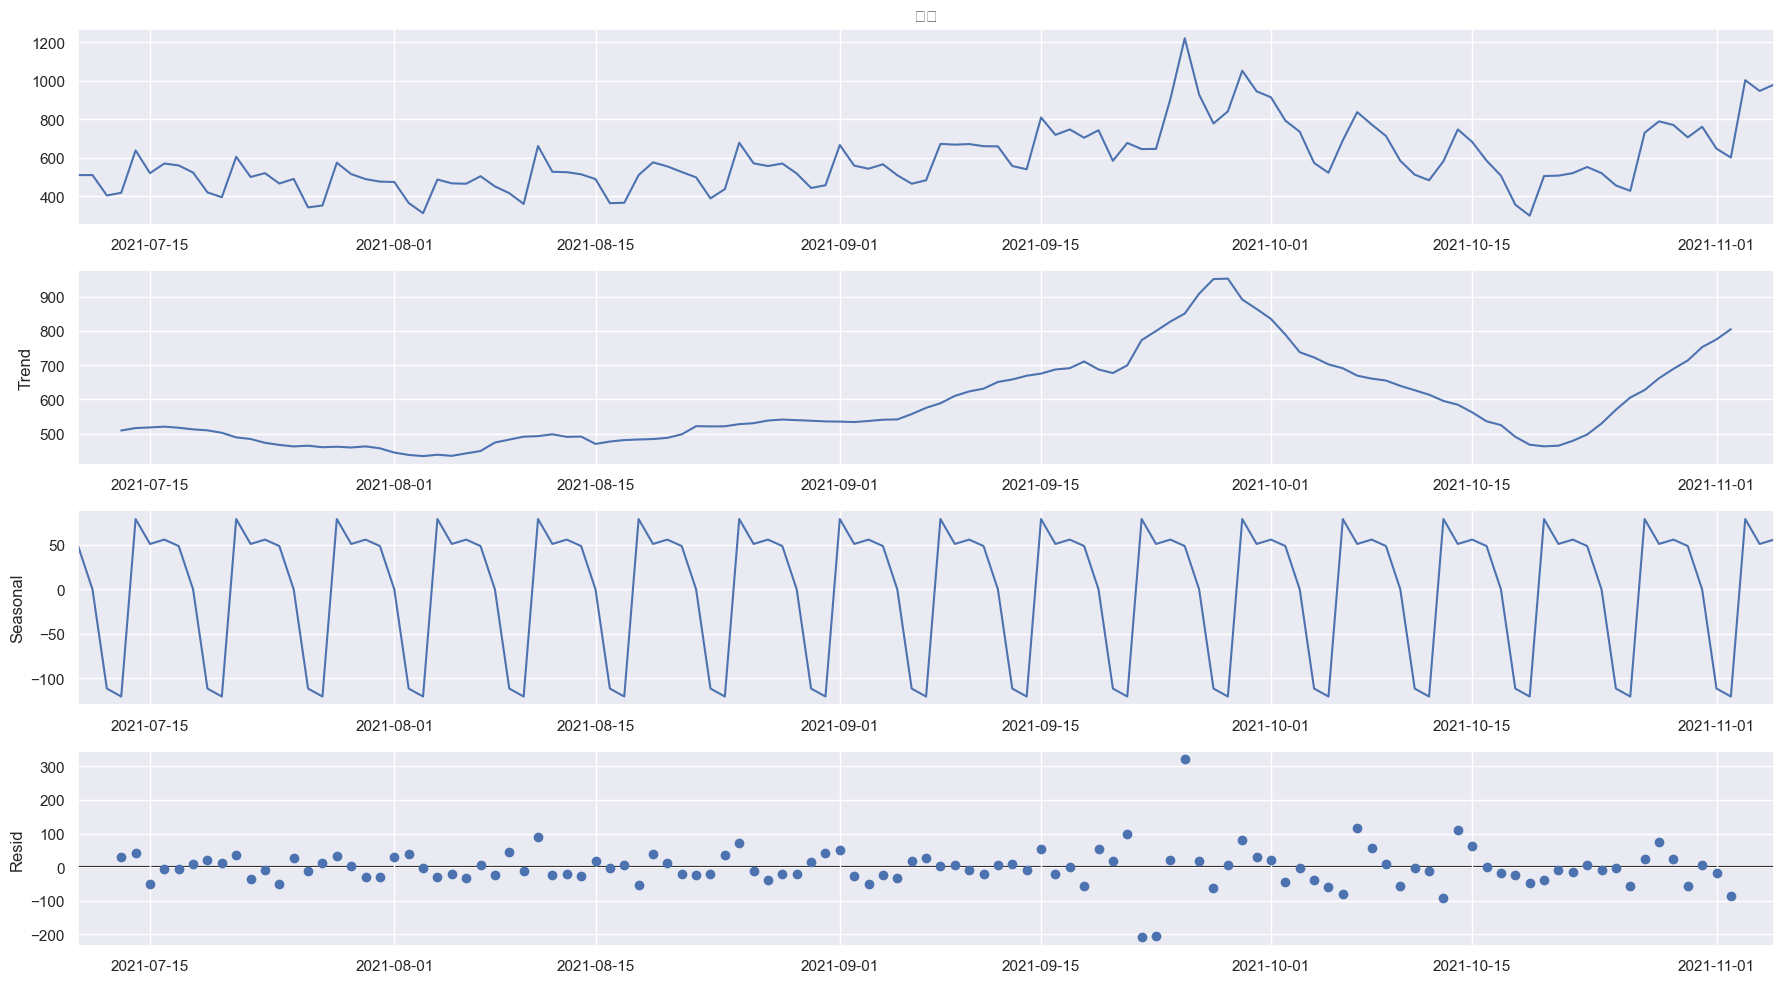

In [282]:
rcParams['figure.figsize'] = 18,10

# 시계열 모델 생성
model_seires = tsa.seasonal_decompose(y_3, model='additive')
# 모델 시각화
fig = model_seires.plot()
plt.show()

In [283]:
p = d = q = range(0,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

param_list = []
param_seasonal_list = []
results_AIC_list = []

In [284]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y_3, order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
            continue

In [285]:
ARIMA_list = pd.DataFrame({'Parameter' : param_list, 'Seasonal':param_seasonal_list,'AIC' : results_AIC_list})
ARIMA_list.to_excel('arima_model_list_3.xlsx')

In [286]:
ARIMA_list.sort_values(by='AIC')

,Parameter,Seasonal,AIC
59,"(1, 1, 1)","(0, 1, 1, 12)",1161.418508
63,"(1, 1, 1)","(1, 1, 1, 12)",1162.503068
27,"(0, 1, 1)","(0, 1, 1, 12)",1168.771462
31,"(0, 1, 1)","(1, 1, 1, 12)",1169.199834
43,"(1, 0, 1)","(0, 1, 1, 12)",1174.232439
...,...,...,...
9,"(0, 0, 1)","(0, 0, 1, 12)",1460.887177
32,"(1, 0, 0)","(0, 0, 0, 12)",1463.378676
1,"(0, 0, 0)","(0, 0, 1, 12)",1573.922703
8,"(0, 0, 1)","(0, 0, 0, 12)",1707.651610


In [287]:
mod = tsa.statespace.SARIMAX(y_3, order=(1,1,1), seasonal_order=(0,1,1,12),
                                enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                 서울   No. Observations:                  119
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -576.709
Date:                            Mon, 07 Nov 2022   AIC                           1161.419
Time:                                    12:56:36   BIC                           1171.506
Sample:                                07-10-2021   HQIC                          1165.490
                                     - 11-05-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5469      0.181      3.025      0.002       0.193       0.901
ma.L1         -0.8409      0.137   

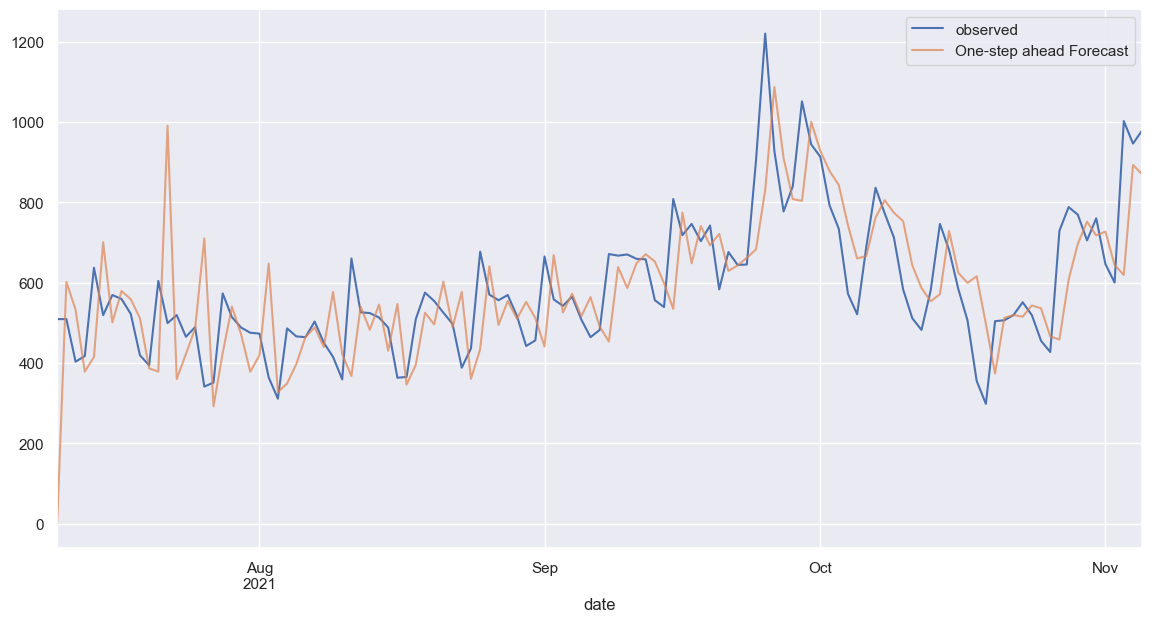

In [288]:
pred = results.get_prediction(start=pd.to_datetime('2021-07-10'), dynamic=False)
pred_ci = pred.conf_int()

ax = y_3.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

plt.legend()
plt.show()

In [289]:
pred_ci.head()

,lower 서울,upper 서울
date,,
2021-07-10,-3394.757202,3394.757202
2021-07-11,-2313.675813,3517.248813
2021-07-12,-2362.132453,3426.935648
2021-07-13,-2515.037170,3271.319421
2021-07-14,-2478.385292,3307.793568


In [291]:
pred = results.get_prediction(start=pd.to_datetime('2021-07-10'), dynamic=False)
pd.DataFrame(pred.predicted_mean).reset_index()

,date,predicted_mean
0,2021-07-10,0.000000
1,2021-07-11,601.786500
2,2021-07-12,532.401597
3,2021-07-13,378.141125
4,2021-07-14,414.704138
...,...,...
114,2021-11-01,726.825239
115,2021-11-02,643.632793
116,2021-11-03,619.058759
117,2021-11-04,892.769320


In [292]:
y_forecasted = pred.predicted_mean
y_truth = y_3['2021-07-10':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

MSE 20599.84


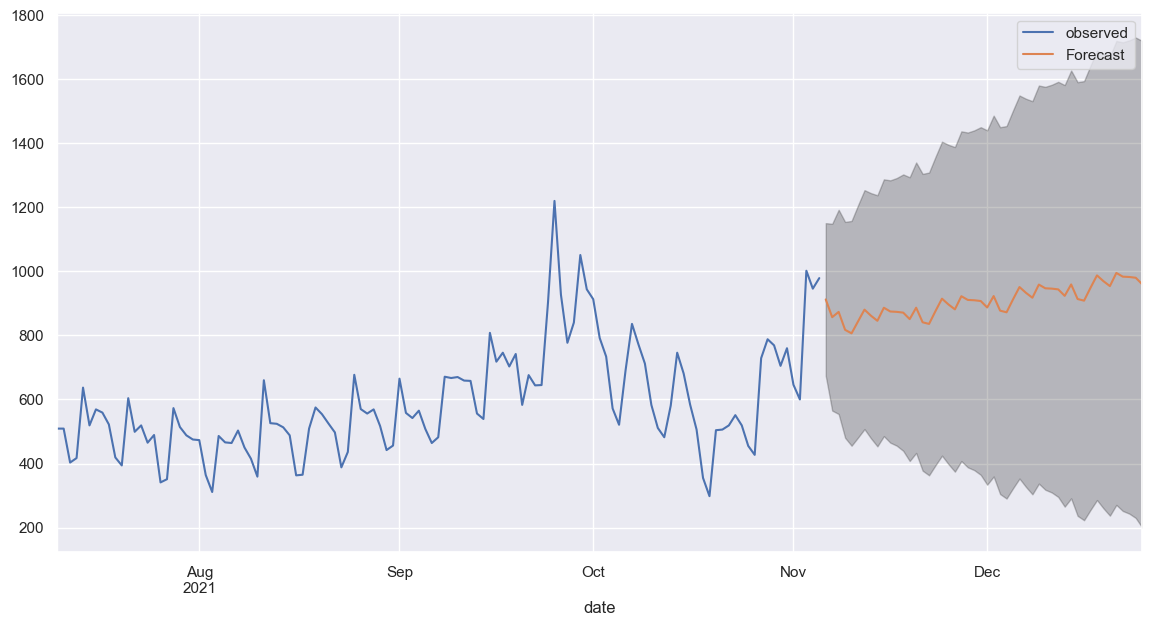

In [294]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int() #추정된 계수의 신뢰구간 계산
ax = y_3.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)

plt.legend()
plt.show()

# 4구간(2022-07-10 ~ 2022-08-31)

# 1구간 XGBoost 

In [297]:
from datetime import datetime
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from xgboost import XGBClassifier

In [330]:
df1 = dataset_total[(dataset_total['date'] >= date_1_start) & (dataset_total['date'] <= date_1_end)][['date', '서울']]
df1 = df1.set_index('date')

In [332]:
df1['month'] = df1.index.month
df1['year'] = df1.index.year
df1['dayofweek'] = df1.index.dayofweek

In [335]:
split1 = '2020-07-05'
df1_train = df1[:split1]
df1_test = df1[split1:]

In [337]:
X_train = df1_train.drop('서울', axis=1)
y_train = df1_train.loc[:,'서울']
X_test = df1_test.drop('서울', axis=1)
y_test = df1_test.loc[:,'서울']

df1_test_orig = df1_test.loc[:,['서울']]

In [338]:
XG_model_month = xgb.XGBRegressor(n_estimators=1000)
XG_model_month.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50,verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

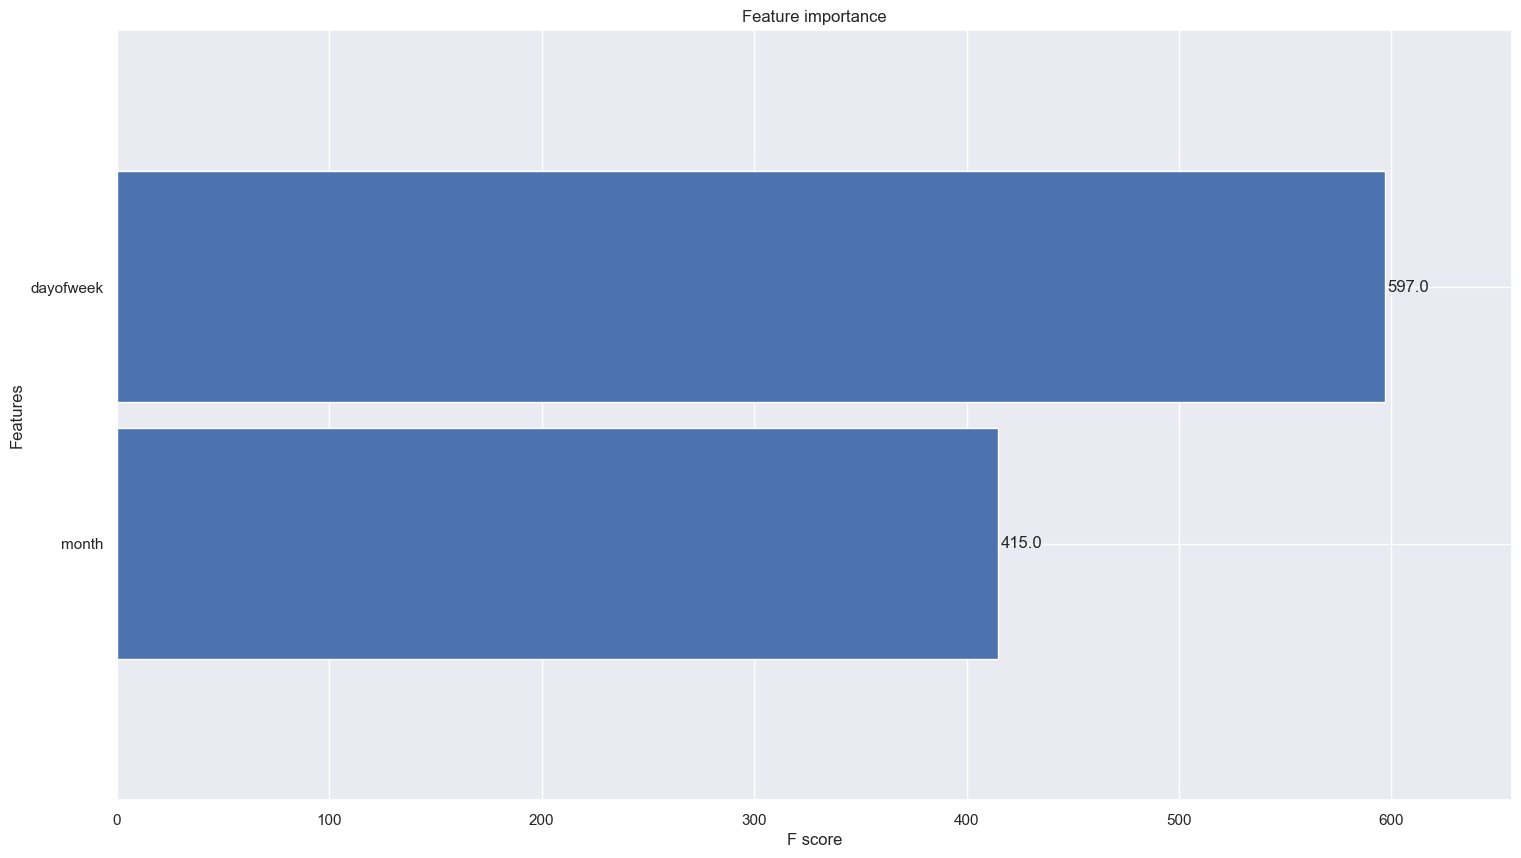

In [339]:
plot_importance(XG_model_month, height=0.9)

In [351]:
xgboost = XG_model_month.predict(X_test)

# 실제 값과 예측 값을 하나의 DataFrame으로 만들고 visualize
xgb_df1 = pd.DataFrame(xgboost, columns=['xgboost'])
df1_result = df1_test_orig.reset_index()

<AxesSubplot:xlabel='date'>

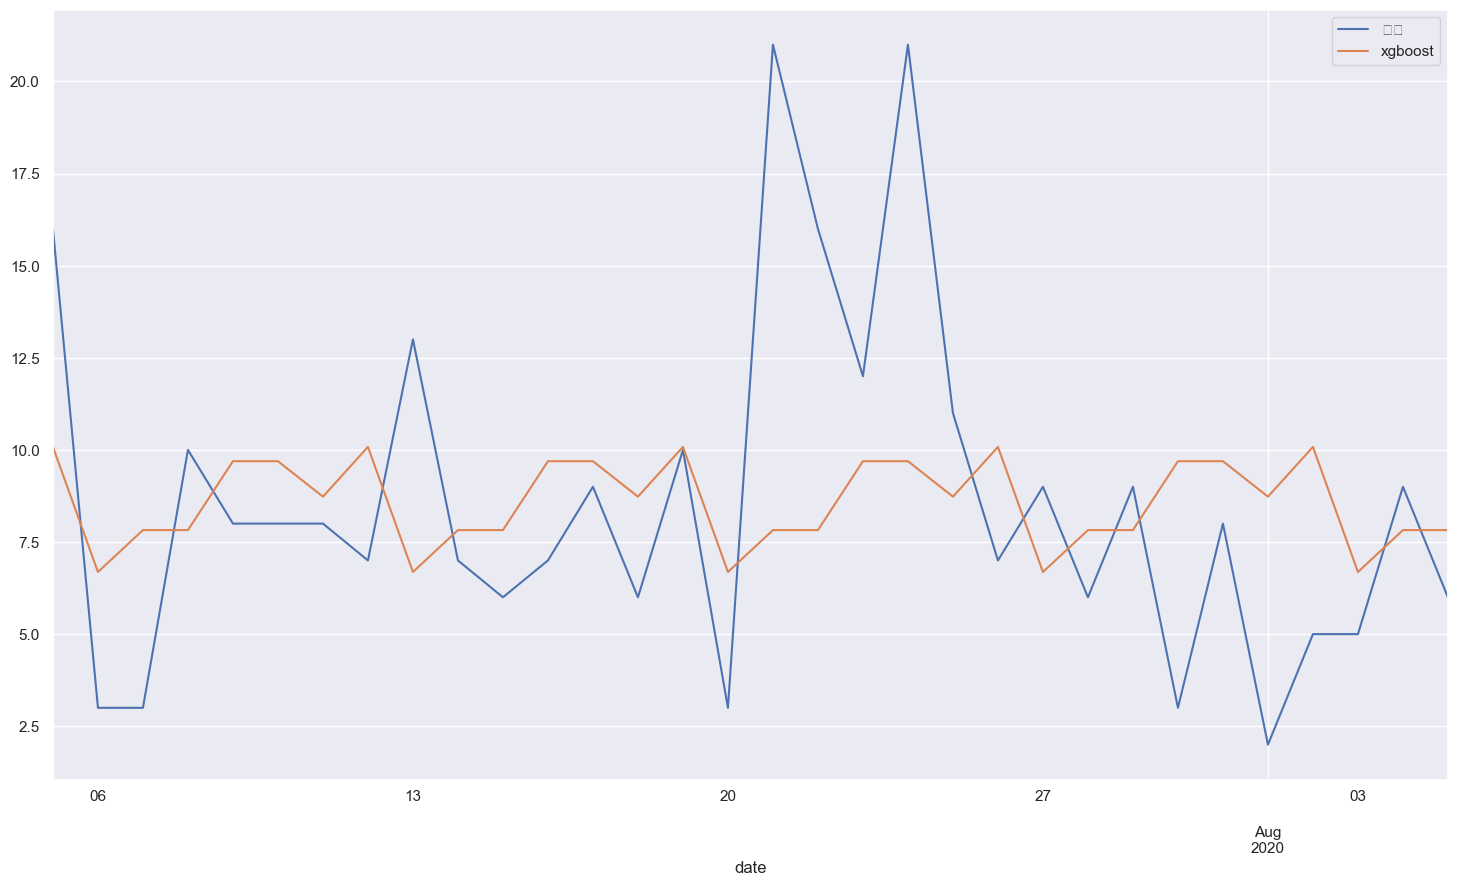

In [356]:
result1 = df1_result.join(xgb_df1, how='left')
result1 = result1.set_index('date')
result1.plot()

In [359]:
def get_result(date_1_start, date_1_end, split):
    df1 = dataset_total[(dataset_total['date'] >= date_1_start) & (dataset_total['date'] <= date_1_end)][['date', '서울']]
    df1 = df1.set_index('date')
    df1['month'] = df1.index.month
    df1['year'] = df1.index.year
    df1['dayofweek'] = df1.index.dayofweek
    df1_train = df1[:split]
    df1_test = df1[split:]
    
    X_train = df1_train.drop('서울', axis=1)
    y_train = df1_train.loc[:,'서울']
    X_test = df1_test.drop('서울', axis=1)
    y_test = df1_test.loc[:,'서울']

    df1_test_orig = df1_test.loc[:,['서울']]
    
    XG_model_month = xgb.XGBRegressor(n_estimators=1000)
    XG_model_month.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50,verbose=False)
    
    plot_importance(XG_model_month, height=0.9)
    
    xgboost = XG_model_month.predict(X_test)

    # 실제 값과 예측 값을 하나의 DataFrame으로 만들고 visualize
    xgb_df1 = pd.DataFrame(xgboost, columns=['xgboost'])
    df1_result = df1_test_orig.reset_index()
    result1 = df1_result.join(xgb_df1, how='left')
    result1 = result1.set_index('date')
    result1.plot()

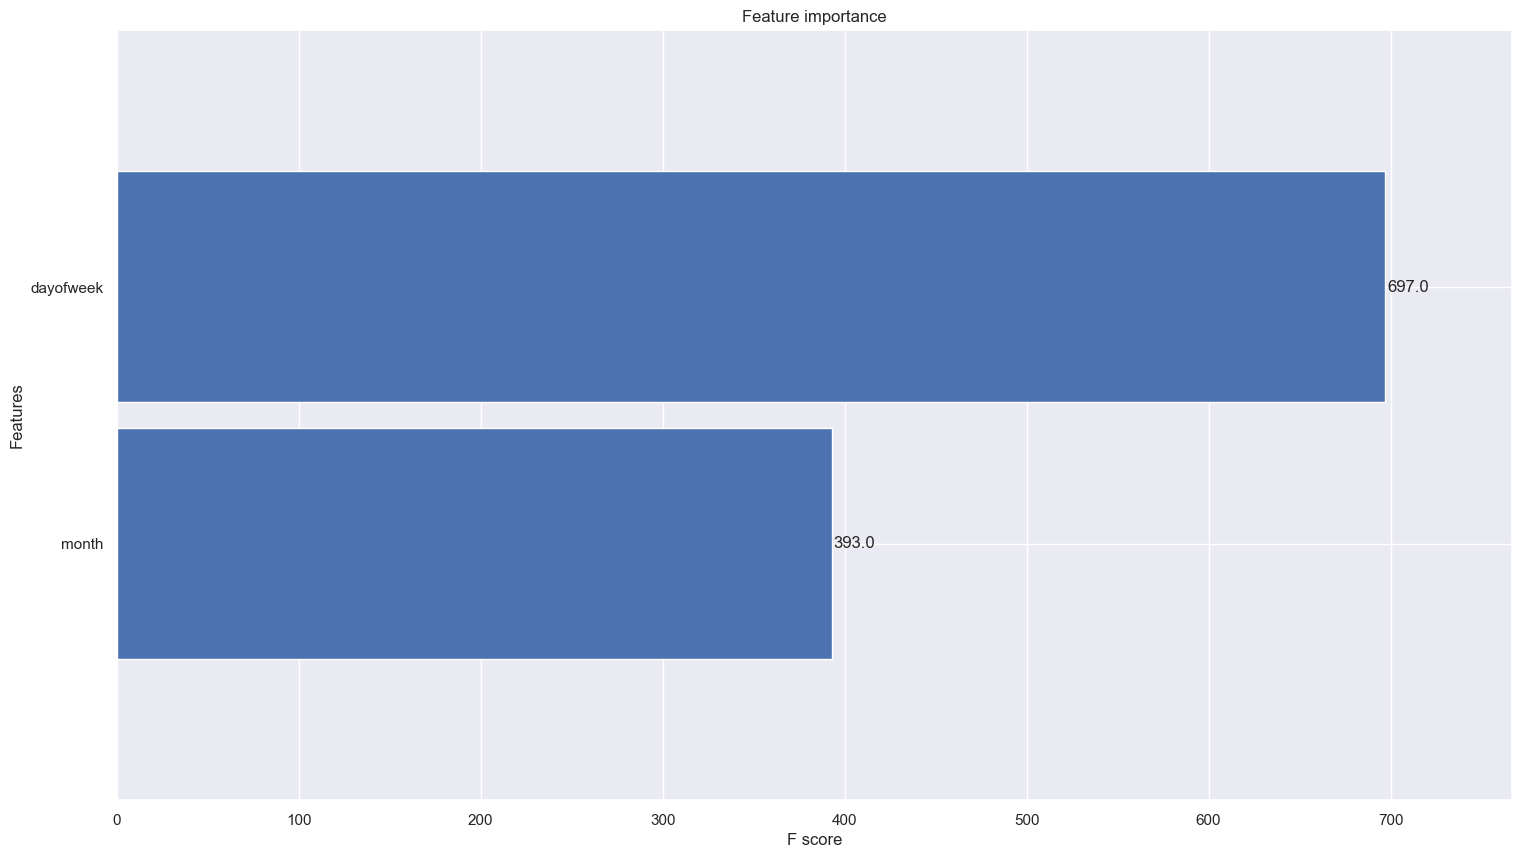

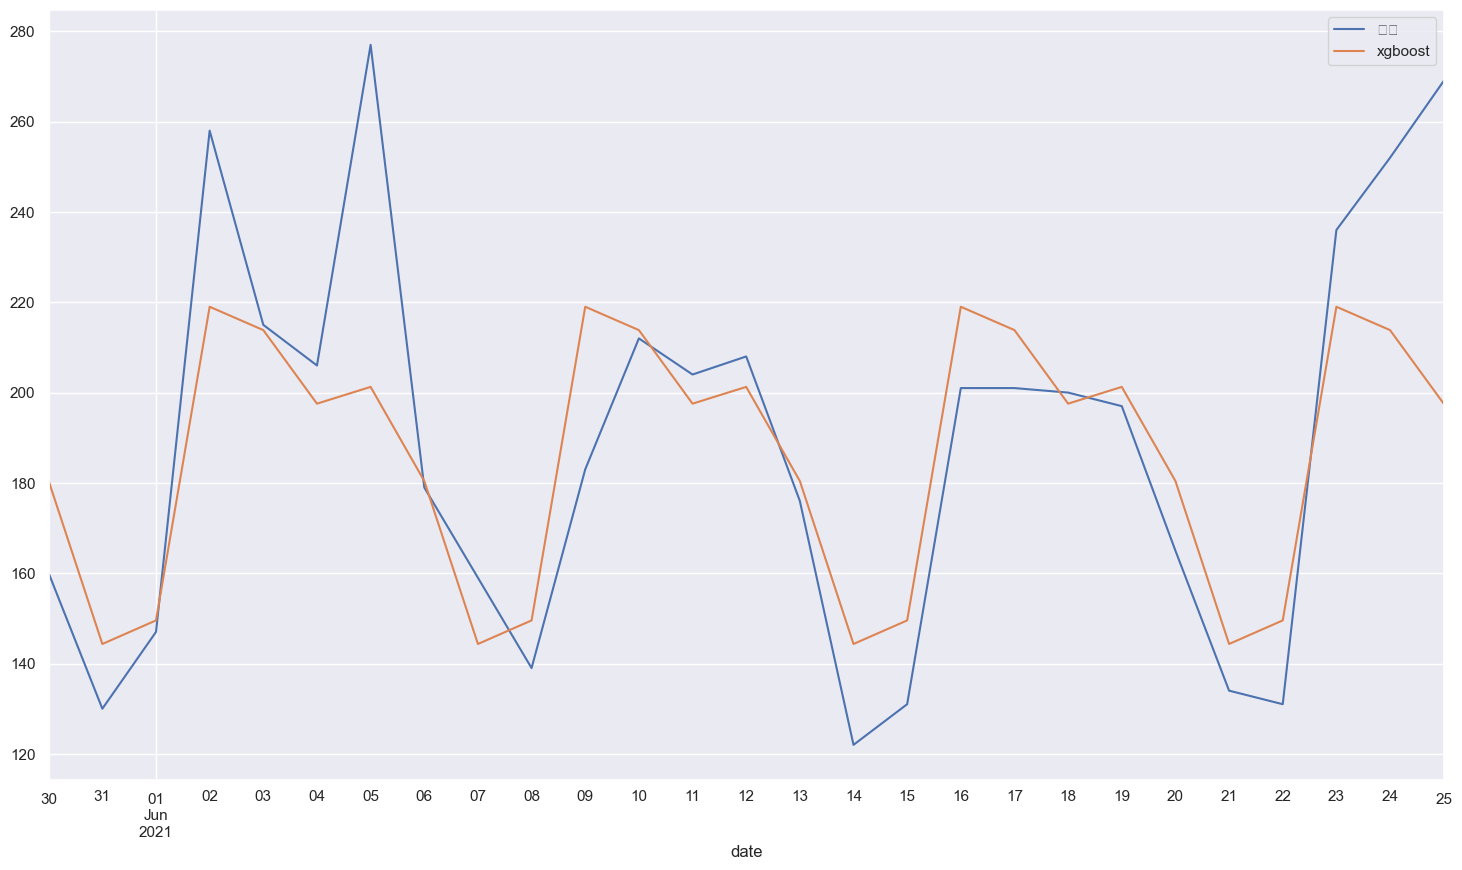

In [371]:
get_result(date_2_start, date_2_end, split='2021-05-30')

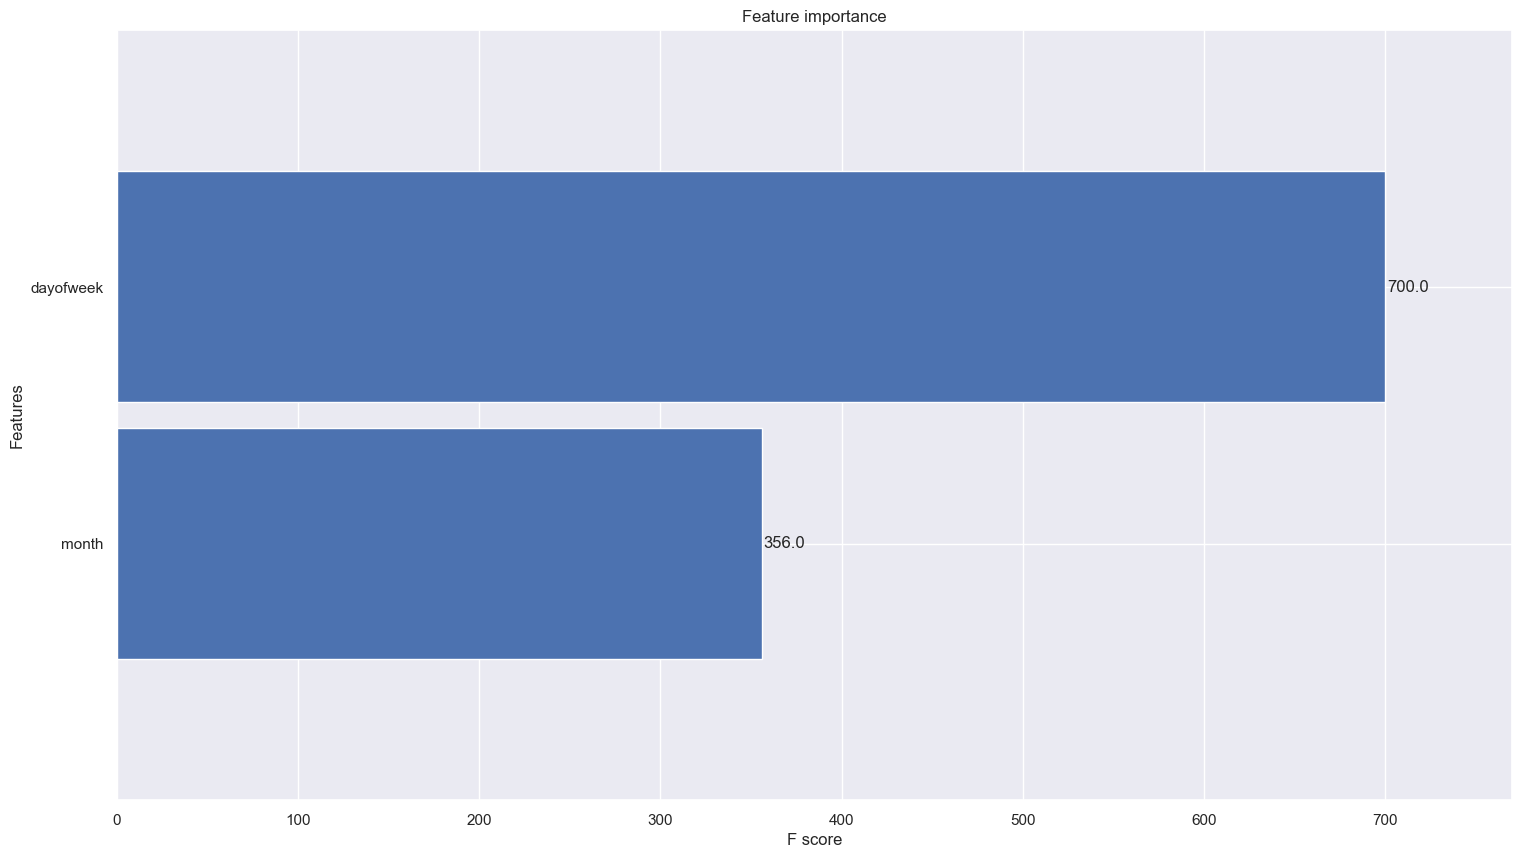

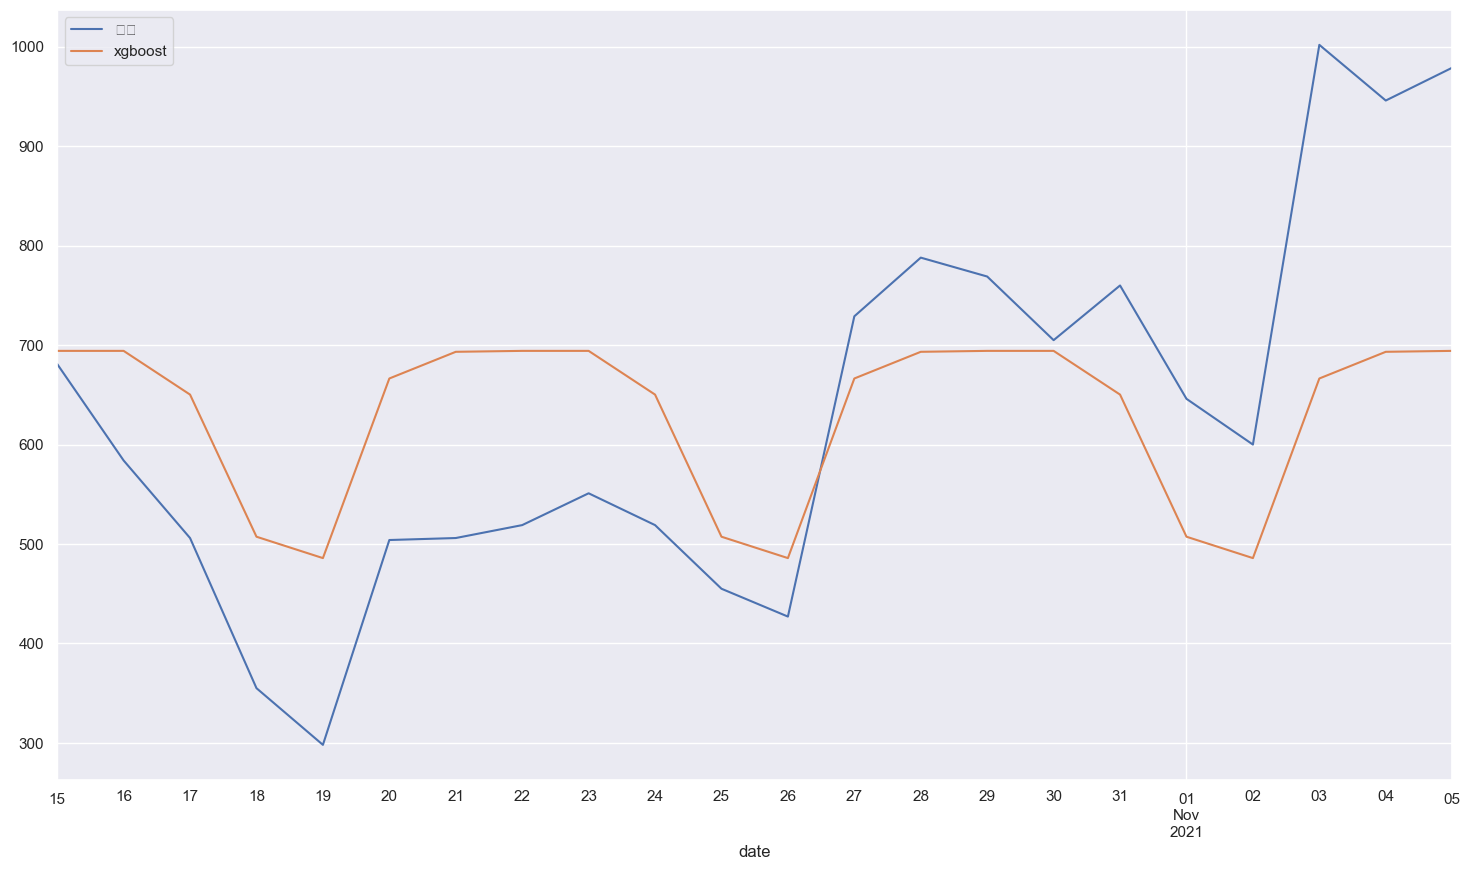

In [372]:
get_result(date_3_start, date_3_end, '2021-10-15')

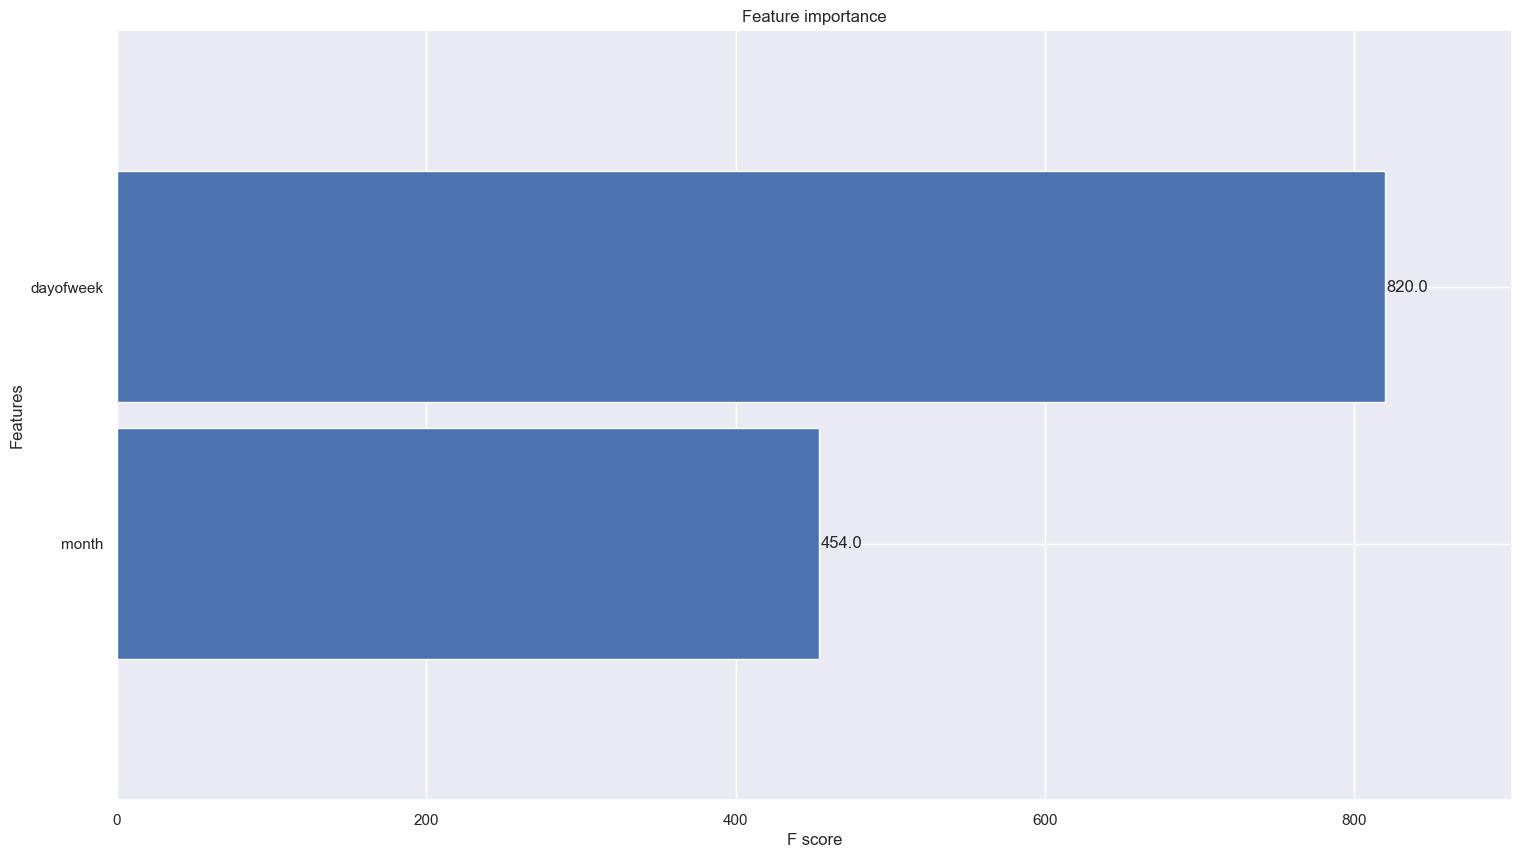

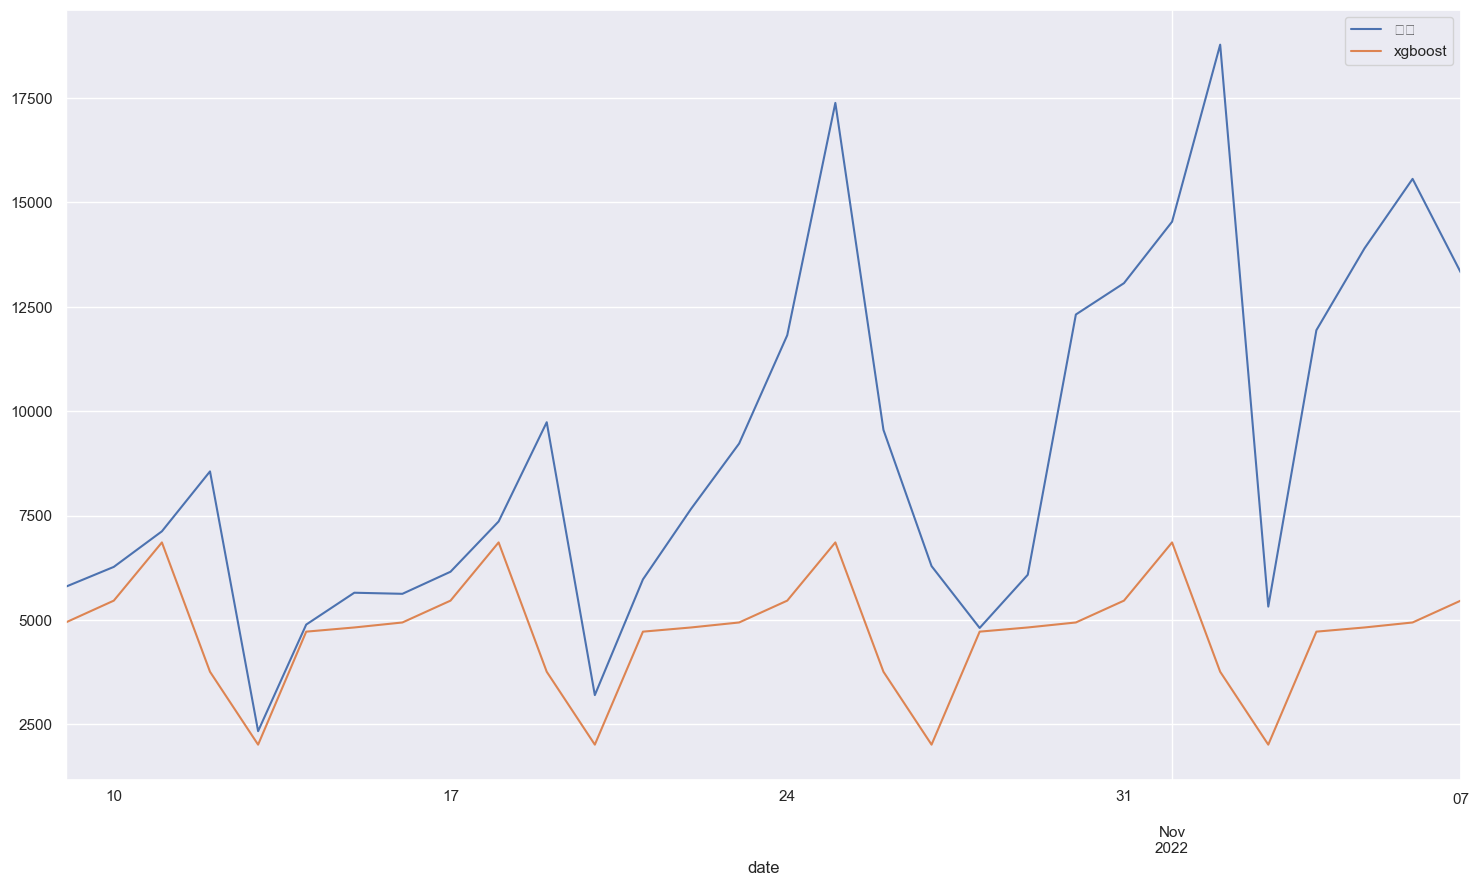

In [374]:
get_result(date_4_start, date_4_end, '2022-10-09')